# Hacking Growth for Case Study


## 1. Data Profiling


## 2. Starting with a new tool



By: [Kemeng Zhang](kemeng_zhang@swissre.com)
Date: April 8th, 2021





<span style="font-family:Papyrus; font-size:1em;">Check the slide by pressing arrow on the navigation panel, click 'esc' to navigate between slides</span>




# 1. Data Profiling: why do companies care about their rating?

This analysis is using an open sourced dataset of over [Free 7+ Million Global Companies](https://data.world/peopledatalabs/free-7-million-company-dataset) from Linkedin Web Data and aims to explore relevant information regarding relationships among key categories. It is basically divided into four sections: 


- **Introduction**, where the investigation problem is set and the dataset is described; 


- **Data Wrangling**, where the acquired data are cleaned and parsed;


- **Exploratory Data Analysis**,where some patterns are explored and this data is enriched with another Glassdoor data;


- **Conclusion**, where the found insights about the problem are reviewed and communicated.



In [2]:
from IPython.display import Image
from IPython.display import HTML

## 1. 1 Introduction

This<a name="read"></a> analysis will use the open sourced dataset of over [7+ Million Global Companies](https://data.world/peopledatalabs/free-7-million-company-dataset) 

The analysis focuses on the question of how talent loss (the difference between total employee estimate and current employee estimate) correlates to ratings, different countries especially between developing and developed countries, and finally various industries. The initial dataset is being extracted to answer the question, including a set of key characteristics about the company in each row:
* <span style="color: blue">'name'</span>: tell us which company it is
* <span style="color: blue">'year founded'</span>: tell us which year the company is founded
* <span style="color: blue">'industry'</span>: tell us which industry the company belongs to 
* <span style="color: blue">'size range'</span>: tell us how large in general the company is
* <span style="color: blue">'country'</span>: tell us where the company's headquater is
* <span style="color: blue">'current employee estimate'</span>: tell us how many current employee the company has
* <span style="color: blue">'total employee estimate'</span>: tell us how many total employees the company has 


### 1.1.1 Understanding Data

Load the dataset
```python
df_o = pd.read_csv('companies_sorted 2.csv')
df_o.head(3)
```

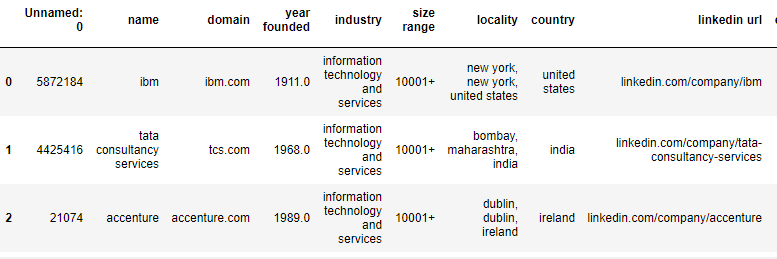

In [3]:
Image(filename = "con_case1_01.png", width=700, height=500)

### 1.1.2 Key Questions 

- **Regarding the year founded:**<a name = "hp"></a> 
    - Which period of years are more companies founded and which years are less?
    
    
- **Regarding the industry:**
     - How is the company data distributed in relation to different industries?
     - How do industries develop around the world? (*trending industry or industry depression*)


- <span style="color:red">Regarding the country:</span>
     - How is the company data distributed in relation to different countries?(*developed v.s. developing countries*)
 
 
- <span style="color:red">Regarding the total/current employee estimate:</span>
     - Do talent loss related to company rating, employee salary, country, or industry?
     - How does the talent loss analysis related to user retention for iptiQ?


- **Regarding the data:**
     - Is the data valid? (*enriched by Glassdoor*)
   

### 1.2 Data Wrangling 

 * Handling missing data   
   
 * Handling duplicates
 
 * Handling outliers
   

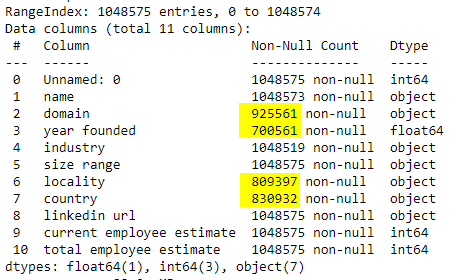

In [37]:
Image(filename = "con_case1_02.png", width=400, height=400)

There are 11 columns in total and no JSON format data types (in case some data may come from Google Analytics). It is possible to notice the dataset has missing values since some attributes have instances less than 1048574. In the way to check it, I will use **missingno** package for further analysis.

**1.2.1 Handling missing data**

According to the null correlation map, missing values from columns like 'name', 'industry' doesn't affect other variables a lot, however, the rest of the columns affect each other, especially missing values from 'country' and 'locality' has a correlation of 0.9. 'year founded' and 'country' has a correlation of 0.4.

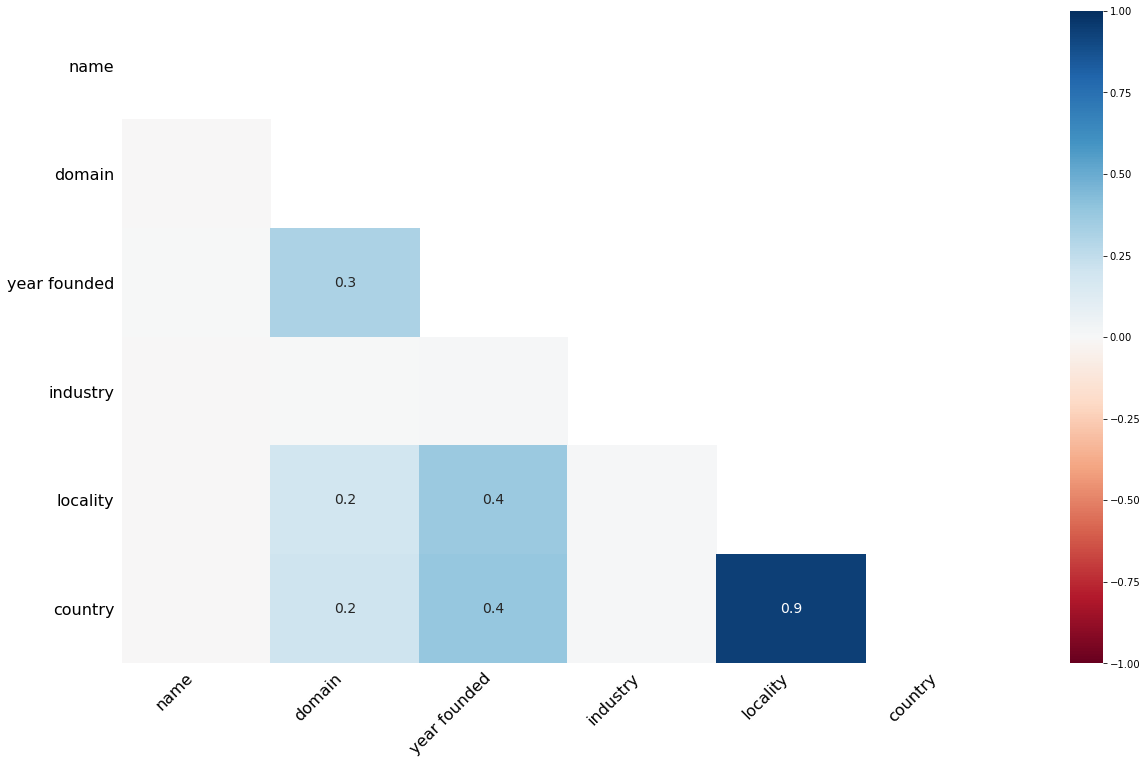

In [42]:
Image(filename = "con_case1_m1.png", width=550, height=550)

**Seperating dataset into categorical value and numerical value to better handling missing values**

```python
cat_var = df_o.columns[df_o.dtypes == 'object']
num_var = df_o.columns[df_o.dtypes != 'object']
```

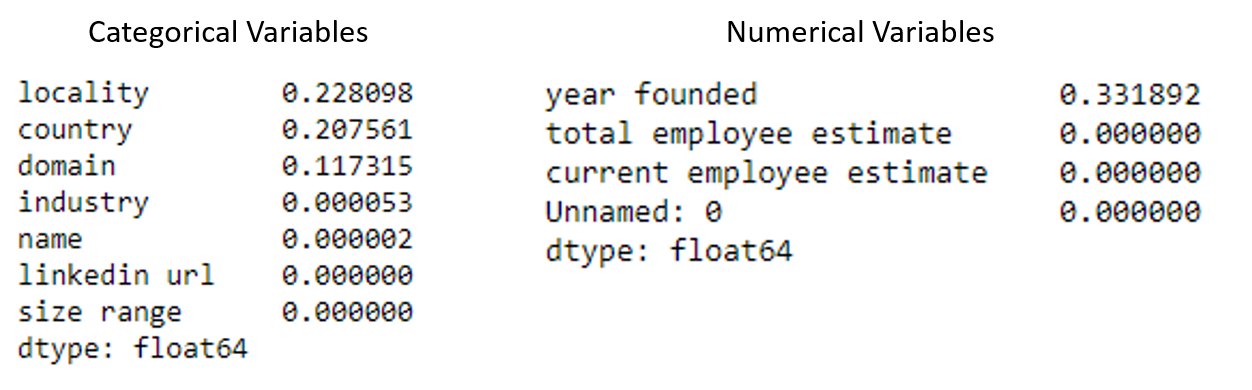

In [14]:
Image(filename = "con_case1_m2.png", width=600, height=600)

**Selecting columns that are relevant to the analysis**
```python
dfc=df_o[['name','year founded','industry','country','current employee estimate','total employee estimate']]
```
**Handling missing data**
```python
## name 
df2=dfc.dropna(axis = 0,subset = ['name'])
## year founded
df_y=df2.dropna(axis = 0,subset = ['year founded'])
## country
df_y['country'].fillna('missing', inplace = True)
## industry
df_y['industry'].fillna('missing', inplace = True)

```

**1.2.2 Handling duplicates**
```python
df_y.drop_duplicates(inplace = True)
```
**1.2.3 Handling outliers**
* Since this is a real-world data, it is very important to know how to define outliers. I define outliers as fake facts that are contradictory to common senses like companies founded in the future.
```python
## total/current employee estimate 
df_y[(df_y['total employee estimate'] - df_y['current employee estimate']) < 0]
## year founded
df_y[df_y['year founded'] < 2020]
```
* Since our further analysis is not related to 'name', there is information for other attributes associated with a specific 'name', thus, there are no defined outliers in 'name'. The same applies to 'country' and 'industry'.

**1.2.4 Mapping categorical data to numerical data**
```python
labelEncoder = LabelEncoder()
dfn['industry_mapping'] = LabelEncoder().fit_transform(dfn['industry'])
dfn['country_mapping'] = LabelEncoder().fit_transform(dfn['country'])
```


### 1.3 Exploratory Data Analysis

 * General Relation and basic statistic distribution 
   
 * Time-series analysis along the year founded
 
 * Apply machine learning technique for talent loss prediction

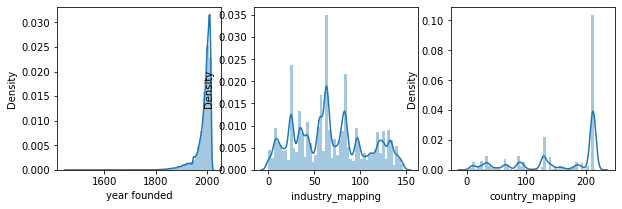

In [19]:
Image(filename = "con_case1_03.png", width=700, height=400)

The plots are not following normal distribution except for industries. 'year founded' and 'country_mapping' are strongly right-skewed which the dataset might bias on some specific countries with more recent founded companies.

**Relationship between total/current employee estimate**

It seems that total employee estimate and curent employee estimate has a linear relationship. However, we can still tell the unit of total is around 10 times larger than the unit of current employee estimate. Later, we will focus on the differences between these two which defined as **talent loss**.

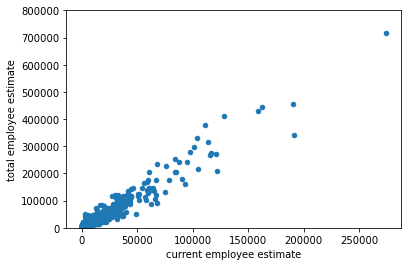

In [23]:
Image(filename = "con_case1_04.png", width=500, height=450)

**1.3.2 Time-series analysis along the year founded**

In this section I will seek to answer the following questions based on the available data:

- How does the volume of companies for different countries develop along with time? 
- How does the distribution of industry in relation to selected countries?

In order to simplify the computation, I specifcally selected three countries (United States, United Kingdom, and India) to represent three continents for further analysis, selected based on volumes of companies

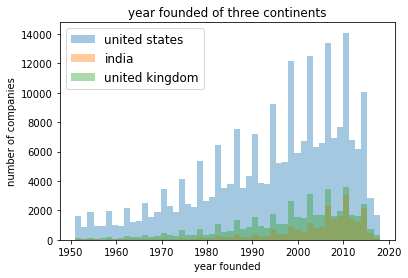

In [25]:
Image(filename = "con_case1_y2.png", width=450, height=450)

In [4]:
HTML('<img src="hist03.gif">')

From the charts above, there is a similar pattern across those three countries with the development of years. Before 2010, the number of companies in all three countries is increasing and after 2010, the numbers drop. There might be interesting potential analysis around the global economy and financial crisis in 2008.

**1.3.3 Comparison of economic development in different countries and industries**

In order to simplify the computation, I specifically selected three countries (United States, United Kingdom, and India) to represent three continents based on volumes of companies and two industries.

```python
## united states
d_us = data[data.country == "united states"]
d_us['Counts'] = d_us.groupby(['year founded'])["country"].transform('count')
## united kingdom
d_uk = data[data.country == "united kingdom"]
d_uk['Counts'] = d_uk.groupby(['year founded'])["country"].transform('count')
## india
d_in = data[data.country == "india"]
d_in['Counts'] = d_in.groupby(['year founded'])["country"].transform('count')

## Insurance Industry
in_d= dfn[dfn.industry == "insurance"]
in_d['Counts'] = in_d.groupby(['year founded'])["industry"].transform('count')
## Information technology and services
it_d= dfn[dfn.industry == "information technology and services"]
it_d['Counts'] = it_d.groupby(['year founded'])["industry"].transform('count')

```


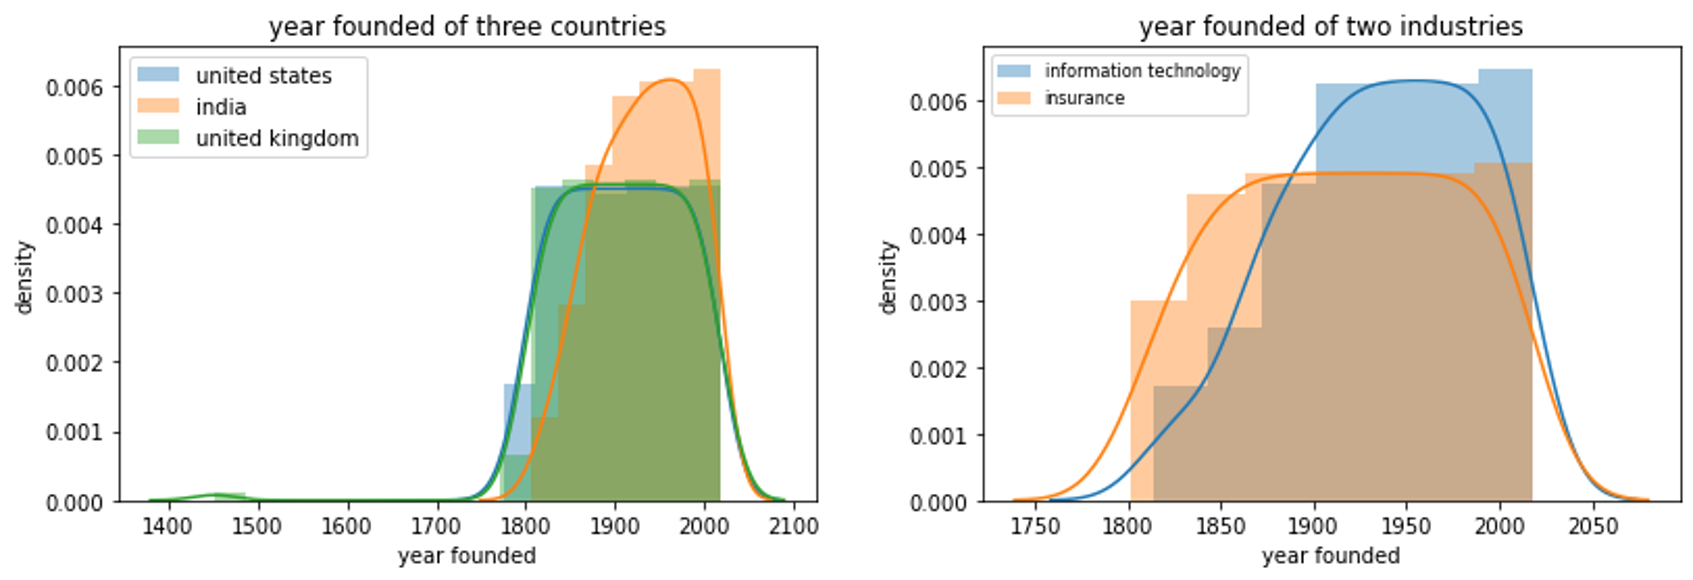

In [27]:
Image(filename = "con_case1_y3.png", width=700, height=450)

From the chart above, we can tell that the US and the UK have companies founded in an earlier time before 1900. However, India has a strong increase regarding development during the last century(the 1900s -2000s), which might indicate that developing countries start economy booming from the last century.

From the chart above, we can tell that the insurance industry is developing earlier than the IT industry starting from 1800, whereas the IT industry starts booming in the late 20th century. **The insurance industry has a rather more stable development than the IT industry.** Some companies might transfer their business along with years like many ealier founded IT companies (< 1850).

### 1.3.4  Prediction on Talent Loss with a dataset from Glassdoor
- What are important attributes of companies that influence talent loss? 
- Do talent loss related to company rating, employee salary, country, or industry?


**Define Talent Loss**
```python
dfn['talent loss'] = (dfn['total employee estimate'] - dfn['current employee estimate'])/dfn['total employee estimate']
get_statistics(dfn['talent loss'])

```
   

**1.3.4.1 Talent loss in different industries:**

    From the charts above, we can see there are different industries in the world and in the US with the least talent loss. 

```python
## US
tl_us=tlp.xs(('united states'))
tl1 = tl_us.sort_values(by='talent loss', ascending=True)[0:10]
```
    

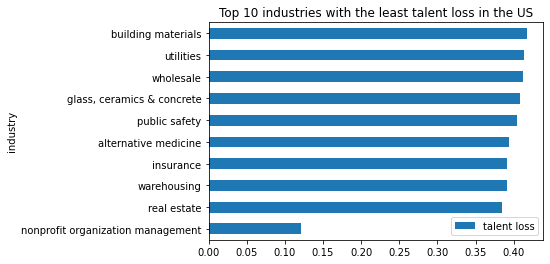

In [32]:
Image(filename = "con_tl_us01.png", width=600, height=500)

**1.3.4.2 Talent Loss per country:**

    From the charts below, I will relate the industry pattern as talent loss in different countries. We can see there are some patterns regarding developing and developed countries.mIn Europe, Spain and France have higher talent loss while Italy, Switzerland and Germany have rather stable development.
```python
## Group by countries and plot in tableu
tl_country = pd.DataFrame(dfn.groupby('country')['talent loss'].mean())
tl_country['std'] = dfn.groupby('country')['talent loss'].std()
```
    
    
    

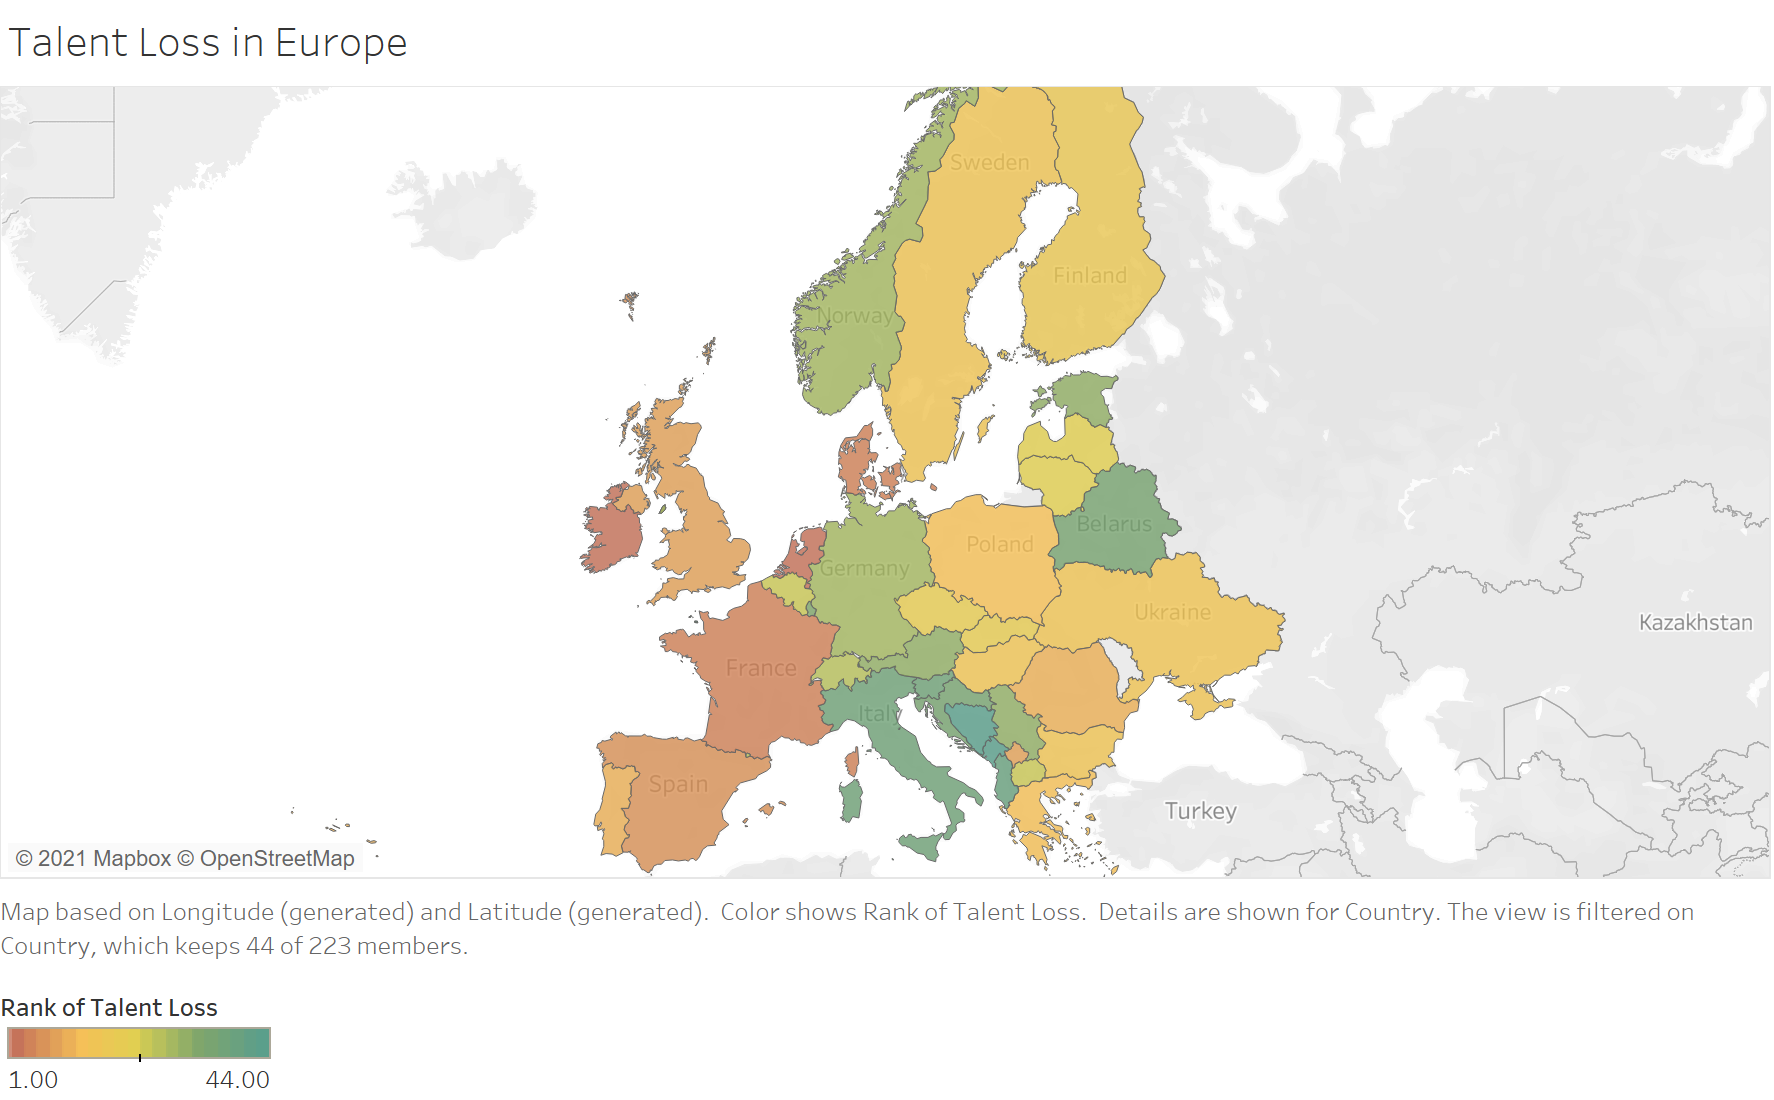

In [33]:
Image(filename = "e1.png", width=600, height=500)

**1.3.4.2 Talent Loss per country:**

    From the chart below, it seems that developed countries might encounter saturation in economy and have generally higher talent loss compared to developing countries in Asia and Africa.
    This might induce the hypothesis that talent loss is related to the location of companies, which we will test out in the later prediction analysis.

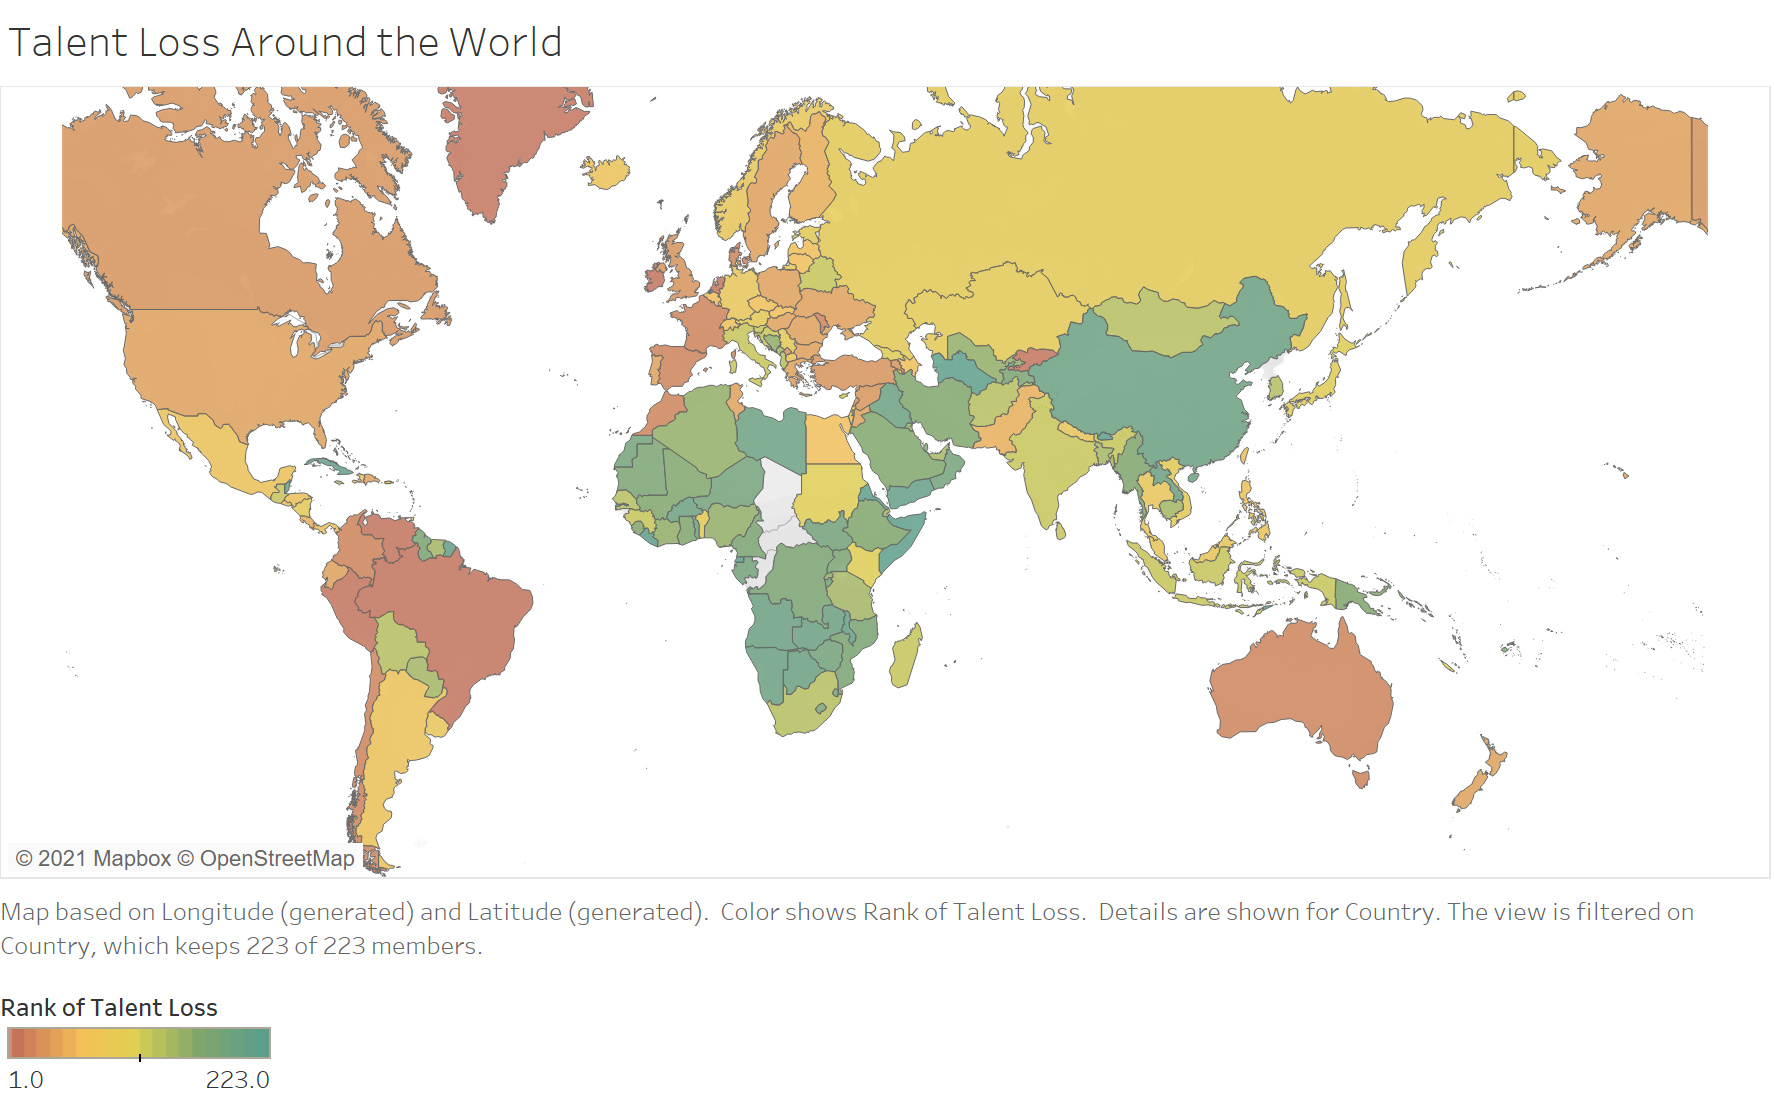

In [10]:
Image(filename = "w1.png", width=700, height=700)

**1.3.4.3  Prediction on Talent Loss with a dataset from Glassdoor**

****The initial Glassdoor dataset**** is being extracted to answer the question, including a set of key characteristics about the company in each row:
* <span style="color: blue">'name'</span>: which company and used to merge with the current dataset 
* <span style="color: blue">'salary'</span>: average employee salary for the company 
* <span style="color: blue">'rating'</span>: average rating for the company
* <span style="color: blue">'numOfrates'</span>: number of rates for the company
    

**Check the correlation of different variables in the combined dataset**

From the heatmap above, we can tell that in general **the talent loss has a negative relationship with rating with a score of "-0.17"**.

```python
#Correlation Matrix
corr = df_lg.corr()
corr = (corr)

```
    

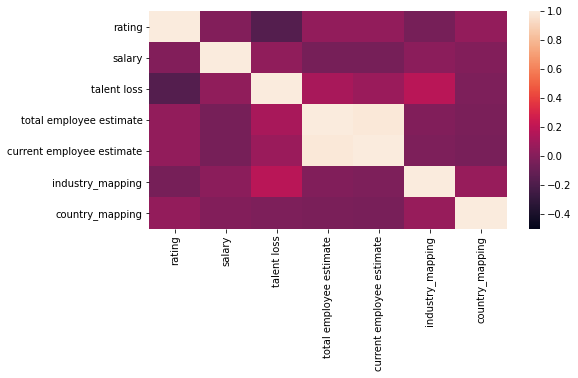

In [45]:
Image(filename = "con_tl_heat01.png", width=400, height=400)

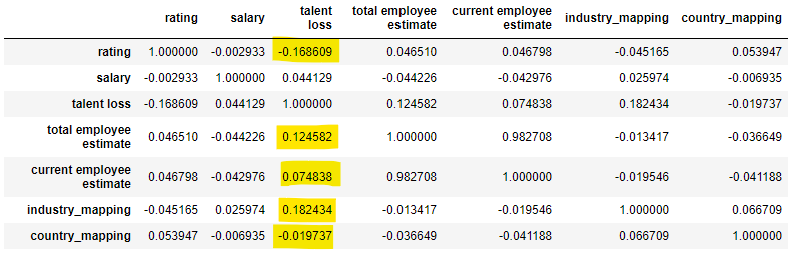

In [46]:
Image(filename = "con_case1_h1.png", width=700, height=500)

**KMeans Classification**

From the k-means classification chart, we can tell that there are not clear groups in this case. However, there is a slight drop from center 4 to center 5, which indicates that companies get less talent loss when they get a higher rating above 4.5 in Glassdoor.

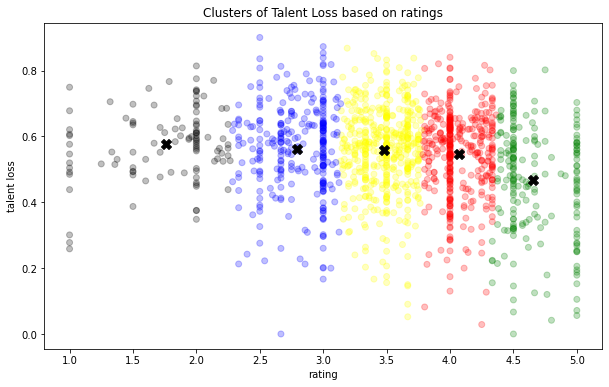

In [13]:
Image(filename = "con_tl_km01.png", width=600, height=600)

### 1.3.5 Ordinary least squares (OLS) regression

In this section, I would like to use OLS regression to build a simple ML model to predict the talent loss (mighe be user retention in iptiQ).

The model including:
* <span style="color: blue">independent variables</span>:
    * rating
    * salary
    * industry_mapping
    * country_mapping
* <span style="color: blue">dependent variable</span>: 
    * talent loss
    
    
  <span style="font-family:Papyrus; font-size:1em;">Check the sub-slide by pressing down arrow on the key board or the navigation panel</span>

#### OLS Regression Results 

| Variables        | coef       | 
| ------------- |:-------------|
| rating      | -0.1810 |
| salary      | 0.0370      |  
| industry_mapping | 0.0859      |
| country_mapping | -0.0192      |
| const | 0.0273      |

we can find the negative coefficiency of rating (**-0.18**) which kind of match the hypothesis that **companies with better rating will have less talent loss**.

R-score | AIC | BIC
--- | --- | ---
0.061 | -1.096e+04 | -1.094e+04

### 1.3.6 Analysis Limitation:

* **Concerning the data acquisition:**
    * There is no description on how the data were acquired;
    * There is no description on the categories of dataset.
    
    
    
* **Concerning the data scope:**
    
    The dataset includes more than 1 million companies around the world. There is a larger proportion (around 40%) from the United States without further description of the representativeness for the rest of the countries. The sampling strategy is unknown in this case. 
    
    
* **Concerning the data quality:**
    
    Besides, there were few data to be cleaned in the provided dataset, some of them suggest a process issue that should be verified in the case of in-depth research. 
    
    
* **Concerning the data analysis:**
    
    Given the above, the current analysis was limited to show intuitive how companies evolve with different countries and years. 
    

##  1.4 Conclusion for Data Profiling

This<a name="end"></a> analysis sought to explore the open-source company dataset, available [here](https://data.world/peopledatalabs/free-7-million-company-dataset), containing more than 100.000, 000  companies around the world.

* <span style="color:red">Additional data might be relevant to the causal  analysis or validity of the dataset besides data from web analytics tools.</span>


* <span style="color:red">In projects like user acquisition, we probably will encounter similar problems of investigating causes of user loss</span>



* <span style="color:red">Potential Data project: </span>
    * How company rating/salary affect its growth and employee turnover
    * Which industry is in depression and which ones are growing around the world
    * Which countries have fast-growing companies in the world

# 2. Starting with a new tool: speed? coverage?


Imagine that you would like to implement Google Optimize for A/B Testing.


- **What are the possible integration approaches? Please detail the pros and cons for each approach.**


- **As next step, you would need to set up the A/B Testing for a new product going live in 3 weeks. How would you make sure that there are no technical glitches by go live time?**




## 2.1 Integration
### 2.1.1 Measurement Matrix

We would like to make sure the web performance matrix (page speed, ftp, DOM, etc.) is not affected by inserting a new snippets while keeping the A/B testing experiment cover as many visitors as possible.


| Web Performance        | A/B Testing Experiement      | 
| ------------- |:-------------|
| Page speed     | Flickering |
| Download speed      | Experiment coverage     |  
| Image/video loading | Event trigger accuracy      |





### 2.1.2 Multiple Integration Approaches

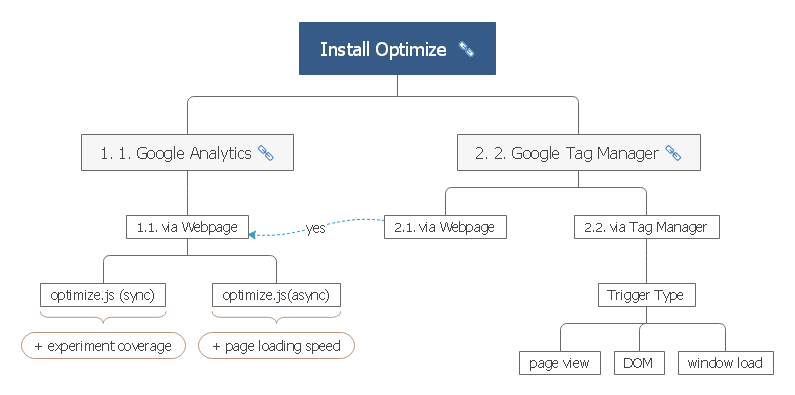

In [14]:
Image(filename = "con_case2_01.png", width=700, height=700)

### 2.1.3 Pros & Cons Analysis

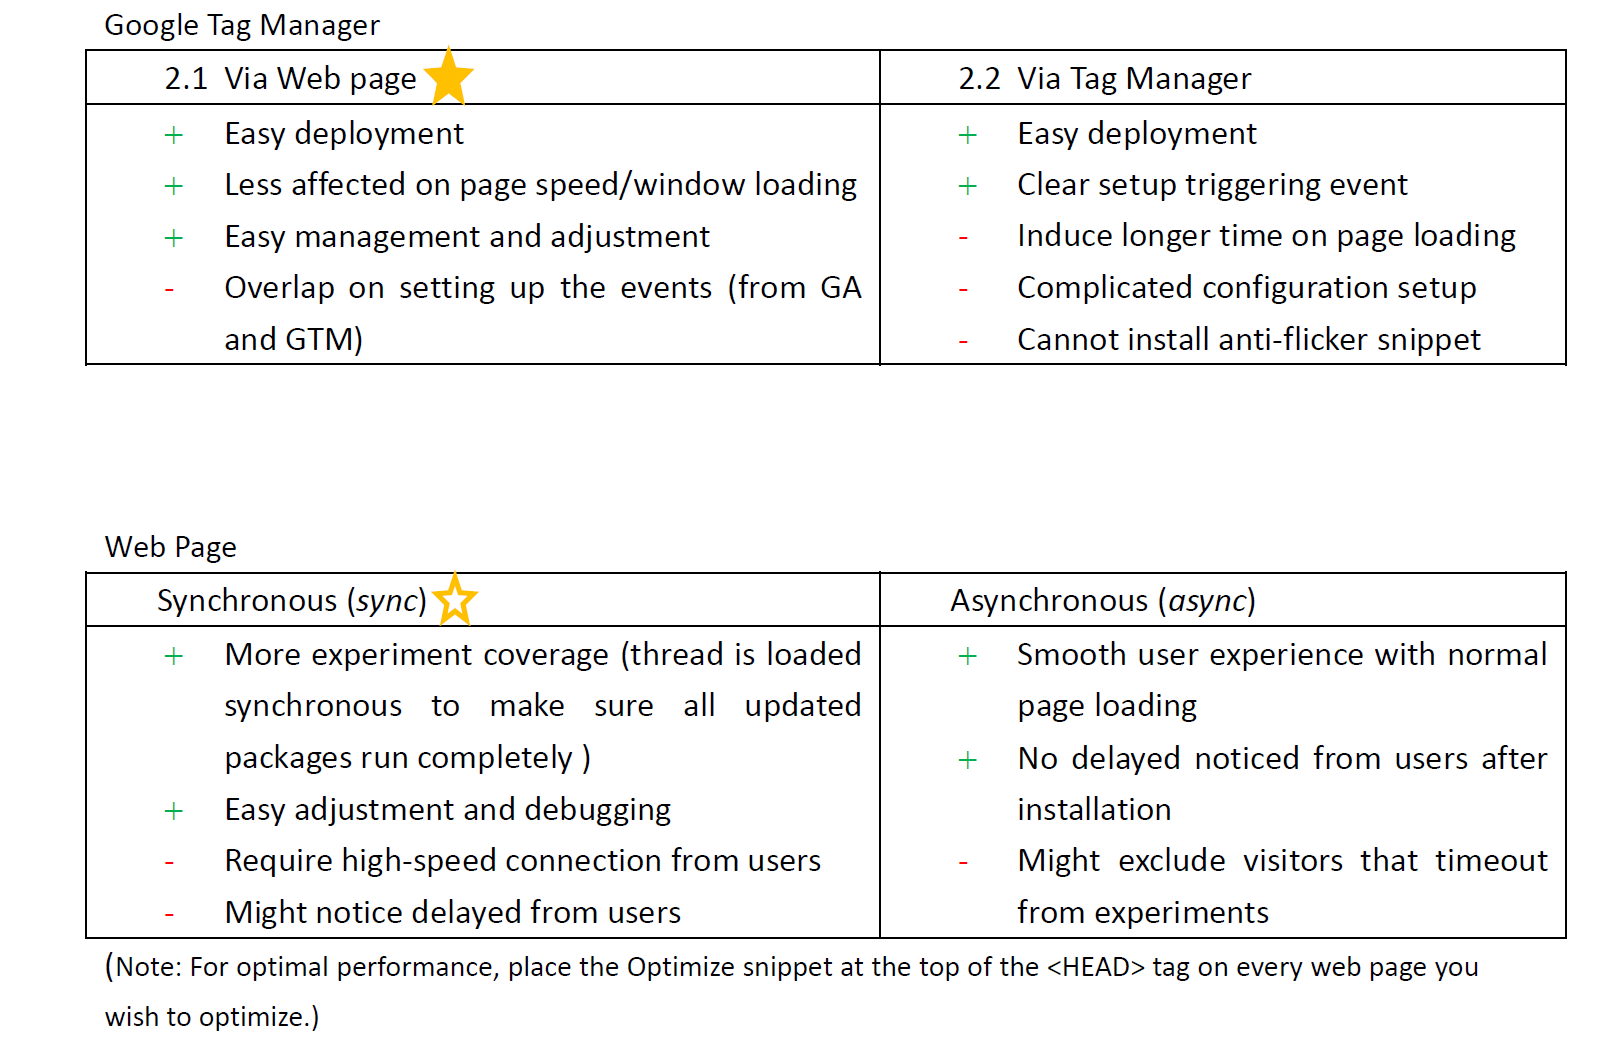

In [15]:
Image(filename = "con_case2_02.png", width=700, height=700)

## 2.2 Technical Glitches
### 2.2.1 Page flicker
Page flicker - occurs when a browser engine renders a web page before all of the information is retrieved 
  * **First move your Optimize snippet to the top of the <HEAD> in your HTML**    
  * **Using the Optimize anti-flicker snippet**
        a. Place the Optimize snippet at the top of the <HEAD> tag on every web page you wish to optimize
        b. Customize the anti-flicker snippet as needed    
  * **Do not install the anti-flicker snippet**
        a. If your Optimize snippet isn't at the top of the <HEAD>.
        b. If you use activation events that don't fire changes on the first load.
        c. With a tag management system (TMS) like Google Tag Manager (GTM) (since it should be installed inline).

 **Customize the anti-flicker snippet as needed**
 
* Time out
* Name of classes
* Multiple containers

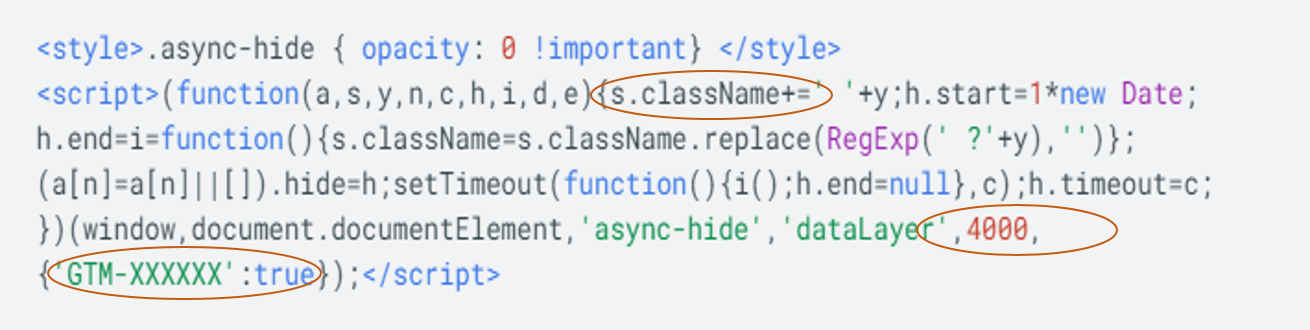

In [40]:
Image(filename = "con_case2_03.png", width=700, height=300)

##  Conclusion 
### 2. Starting with a new tool
We would like to make sure the web performance matrix (page speed, ftp, DOM, etc.) is not affected by inserting a new snippets while keeping the A/B testing experiment cover as many visitors as possible. Thus, detailed considerations for possible integration approaches are necessary. Networking connection is also an important factor while considering asynchronous or synchronous integration.


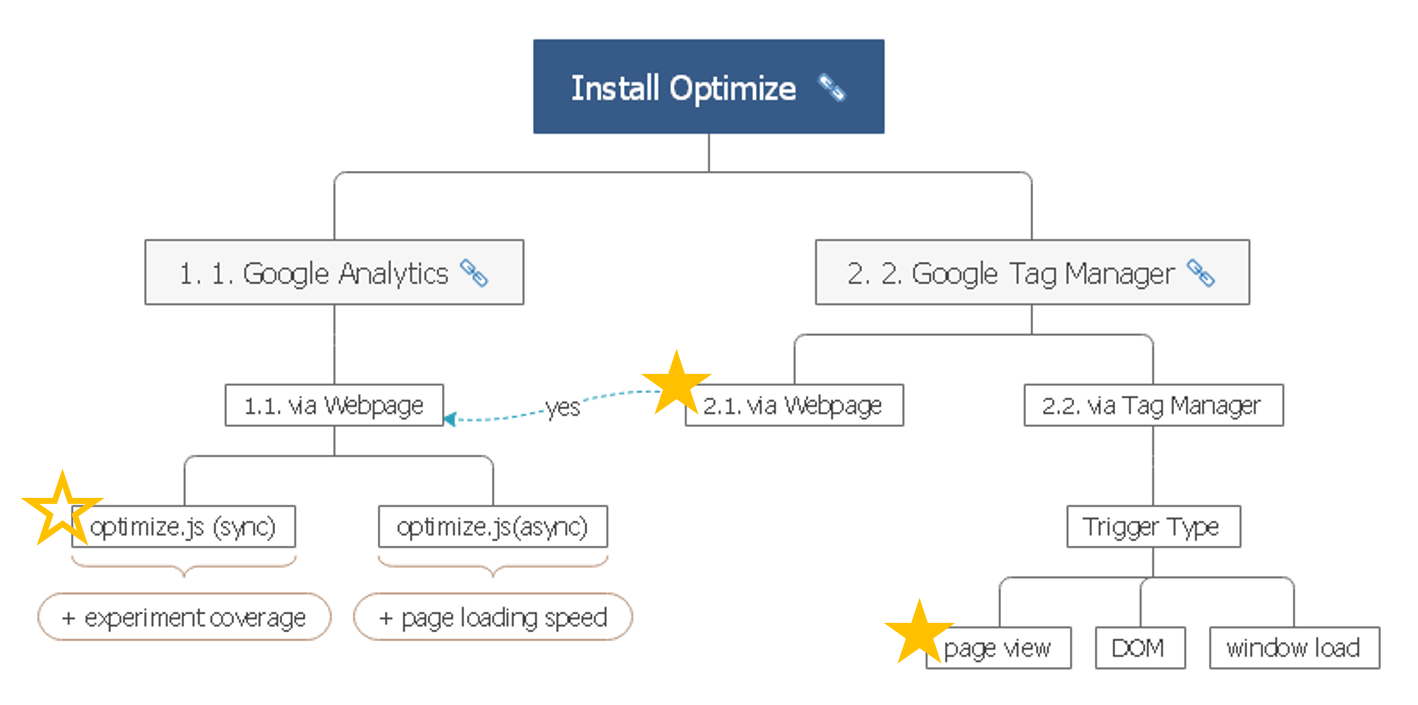

In [17]:
Image(filename = "con_case2_05.png", width=600, height=400)

<span style="font-family:Papyrus; font-size:7em;">Q&A </span>

---

<span style="font-family:Papyrus; font-size:2em;">Thanks!</span>


<span style="font-family:Papyrus; font-size:1em;">click 'esc' to navigate between slides</span>